In [4]:
from google.colab import drive
drive.mount('/content/drive')

!cp drive/MyDrive/OptML/model.py .
!cp drive/MyDrive/OptML/helpers.py .

!cp drive/MyDrive/OptML/DemonRangerOptimizer/optimizers.py .
!cp drive/MyDrive/OptML/DemonRangerOptimizer/helpers_demon.py .

!cp drive/MyDrive/OptML/YellowFin/yellowfin.py .
!cp drive/MyDrive/OptML/YellowFin/helpers_yellowfin.py .

from model import *
from helpers import *

from optimizers import DemonRanger
from yellowfin import YFOptimizer

from helpers_demon import *
from helpers_yellowfin import * 

import matplotlib.pyplot as plt
import torchvision.datasets as datasets

# torch.manual_seed(42)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

mnist_train = datasets.MNIST(root='./data', 
                             train=True, 
                             download=True, 
                             transform=transform)
mnist_test = torchvision.datasets.MNIST('./data/files/', 
                                        train=False, 
                                        download=True,  
                                        transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/train-images-idx3-ubyte.gz to ./data/files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/files/MNIST/raw



### ADAM + LinearLR

In [22]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 180, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': LinearLR, 
              'scheduler_parameters': {'start_factor': 0.03}}

model = Net()
model.to(device)

acc_linear, losses_linear, time_linear = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 1.3528


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:538: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 0: lr = [0.0033450666666666666], test accuracy 0.8974
Batch 500 / 938: loss = 0.3053
Epoch 1: lr = [0.0015600357142857143], test accuracy 0.9496
Batch 500 / 938: loss = 0.1633
Epoch 2: lr = [0.0017920765550239236], test accuracy 0.9689
Batch 500 / 938: loss = 0.1074
Epoch 3: lr = [0.0021229934640522876], test accuracy 0.9714
Batch 500 / 938: loss = 0.0768
Epoch 4: lr = [0.0024813895781637713], test accuracy 0.9733
Batch 500 / 938: loss = 0.0619
Epoch 5: lr = [0.0019999999999999996], test accuracy 0.9719
Batch 500 / 938: loss = 0.0481
Epoch 6: lr = [0.0019999999999999996], test accuracy 0.9789
Batch 500 / 938: loss = 0.0369
Epoch 7: lr = [0.0019999999999999996], test accuracy 0.9774
Batch 500 / 938: loss = 0.0336
Epoch 8: lr = [0.0019999999999999996], test accuracy 0.9726
Batch 500 / 938: loss = 0.0288
Epoch 9: lr = [0.0019999999999999996], test accuracy 0.9781
Batch 500 / 938: loss = 0.0219
Epoch 10: lr = [0.0019999999999999996], test accuracy 0.9783
Batch 500 / 938: loss = 0.023

### ADAM + ExponentialLR

In [23]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': ExponentialLR, 
              'scheduler_parameters': {'gamma': 0.03}}

model = Net()
model.to(device)

acc_exponential, losses_exponential, time_exponential = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3102


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:575: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 0: lr = [1.8e-06], test accuracy 0.9654
Batch 500 / 938: loss = 0.0794
Epoch 1: lr = [5.3999999999999994e-08], test accuracy 0.9728
Batch 500 / 938: loss = 0.0659
Epoch 2: lr = [1.6199999999999998e-09], test accuracy 0.9726
Batch 500 / 938: loss = 0.0696
Epoch 3: lr = [4.859999999999999e-11], test accuracy 0.9727
Batch 500 / 938: loss = 0.0670
Epoch 4: lr = [1.4579999999999996e-12], test accuracy 0.9727
Batch 500 / 938: loss = 0.0668
Epoch 5: lr = [4.3739999999999986e-14], test accuracy 0.9727
Batch 500 / 938: loss = 0.0703
Epoch 6: lr = [1.3121999999999995e-15], test accuracy 0.9727
Batch 500 / 938: loss = 0.0682
Epoch 7: lr = [3.9365999999999986e-17], test accuracy 0.9727
Batch 500 / 938: loss = 0.0692
Epoch 8: lr = [1.1809799999999995e-18], test accuracy 0.9727
Batch 500 / 938: loss = 0.0697
Epoch 9: lr = [3.542939999999998e-20], test accuracy 0.9727
Batch 500 / 938: loss = 0.0694
Epoch 10: lr = [1.0628819999999993e-21], test accuracy 0.9727
Batch 500 / 938: loss = 0.0668
Epoc

### ADAM + CosineAnnealingLR

In [24]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 120, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': CosineAnnealingLR, 
              'scheduler_parameters': {'T_max': 5, 'eta_min': 0.02}}

model = Net()
model.to(device)

acc_cosine, losses_cosine, time_cosine = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3263


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:729: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 0: lr = [0.005273558813281839], test accuracy 0.9562
Batch 500 / 938: loss = 0.1377
Epoch 1: lr = [0.011475077640500379], test accuracy 0.9647
Batch 500 / 938: loss = 0.1707
Epoch 2: lr = [0.0167172942406179], test accuracy 0.9628
Batch 500 / 938: loss = 0.2162
Epoch 3: lr = [0.01952492235949962], test accuracy 0.9548
Batch 500 / 938: loss = 0.2548
Epoch 4: lr = [0.02], test accuracy 0.9473
Batch 500 / 938: loss = 0.2039
Epoch 5: lr = [0.016562305898749057], test accuracy 0.9608
Batch 500 / 938: loss = 0.1605
Epoch 6: lr = [-0.0025000000000000022], test accuracy 0.9593
Batch 500 / 938: loss = 0.1180
Epoch 7: lr = [-0.00231853648862395], test accuracy 0.9682
Batch 500 / 938: loss = 0.0776
Epoch 8: lr = [-0.002499999999999992], test accuracy 0.9703
Batch 500 / 938: loss = 0.0505
Epoch 9: lr = [9.968943799849861e-05], test accuracy 0.9764
Batch 500 / 938: loss = 0.0315
Epoch 10: lr = [0.005273558813281835], test accuracy 0.9767
Batch 500 / 938: loss = 0.0366
Epoch 11: lr = [0.011475

### ADAM + LambdaLR

In [25]:
def lambda3(epoch):
  return 0.95 ** epoch 

parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': LambdaLR, 
              'scheduler_parameters': {'lr_lambda': lambda3}}

model = Net()
model.to(device)

acc_lambda, losses_lambda, time_lambda = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3196


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:249: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch 0: lr = [0.0019], test accuracy 0.9653
Batch 500 / 938: loss = 0.0964
Epoch 1: lr = [0.001805], test accuracy 0.9743
Batch 500 / 938: loss = 0.0632
Epoch 2: lr = [0.00171475], test accuracy 0.9719
Batch 500 / 938: loss = 0.0407
Epoch 3: lr = [0.0016290124999999997], test accuracy 0.9779
Batch 500 / 938: loss = 0.0323
Epoch 4: lr = [0.0015475618749999996], test accuracy 0.9769
Batch 500 / 938: loss = 0.0233
Epoch 5: lr = [0.0014701837812499997], test accuracy 0.9792
Batch 500 / 938: loss = 0.0175
Epoch 6: lr = [0.0013966745921874994], test accuracy 0.9797
Batch 500 / 938: loss = 0.0121
Epoch 7: lr = [0.0013268408625781245], test accuracy 0.9799
Batch 500 / 938: loss = 0.0098
Epoch 8: lr = [0.0012604988194492182], test accuracy 0.9775
Batch 500 / 938: loss = 0.0091
Epoch 9: lr = [0.0011974738784767574], test accuracy 0.9822
Batch 500 / 938: loss = 0.0083
Epoch 10: lr = [0.0011376001845529193], test accuracy 0.9822
Batch 500 / 938: loss = 0.0088
Epoch 11: lr = [0.0010807201753252733

## SGDM

In [3]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.02,
              'momentum':0.9,
              'nesterov':False, 
              'optimizer': torch.optim.SGD, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25}
model = Net()
model.to(device)

acc_sgdm, losses_sgdm, time_sgdm = run_best_model(mnist_train, mnist_test, model, parameters, device, sgdm=True)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.5666
Batch 500 / 938: loss = 0.1382
Batch 500 / 938: loss = 0.0879
Batch 500 / 938: loss = 0.0588
Batch 500 / 938: loss = 0.0470
Batch 500 / 938: loss = 0.0353
Batch 500 / 938: loss = 0.0287
Batch 500 / 938: loss = 0.0242
Batch 500 / 938: loss = 0.0179
Batch 500 / 938: loss = 0.0154
Batch 500 / 938: loss = 0.0106
Batch 500 / 938: loss = 0.0088
Batch 500 / 938: loss = 0.0051
Batch 500 / 938: loss = 0.0032
Batch 500 / 938: loss = 0.0040
Batch 500 / 938: loss = 0.0017
Batch 500 / 938: loss = 0.0011
Batch 500 / 938: loss = 0.0007
Batch 500 / 938: loss = 0.0006
Batch 500 / 938: loss = 0.0005
Batch 500 / 938: loss = 0.0005
Batch 500 / 938: loss = 0.0004
Batch 500 / 938: loss = 0.0004
Batch 500 / 938: loss = 0.0004
Batch 500 / 938: loss = 0.0003
------ FOLD 2 -------
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.

## Nesterov

In [4]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.05,
              'momentum':0.9,
              'nesterov':True, 
              'optimizer': torch.optim.SGD, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25}
model = Net()
model.to(device)

acc_nest, losses_nest, time_nest = run_best_model(mnist_train, mnist_test, model, parameters, device, sgdm=True)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3968
Batch 500 / 938: loss = 0.1032
Batch 500 / 938: loss = 0.0674
Batch 500 / 938: loss = 0.0478
Batch 500 / 938: loss = 0.0379
Batch 500 / 938: loss = 0.0302
Batch 500 / 938: loss = 0.0209
Batch 500 / 938: loss = 0.0211
Batch 500 / 938: loss = 0.0158
Batch 500 / 938: loss = 0.0136
Batch 500 / 938: loss = 0.0128
Batch 500 / 938: loss = 0.0110
Batch 500 / 938: loss = 0.0060
Batch 500 / 938: loss = 0.0040
Batch 500 / 938: loss = 0.0038
Batch 500 / 938: loss = 0.0048
Batch 500 / 938: loss = 0.0036
Batch 500 / 938: loss = 0.0061
Batch 500 / 938: loss = 0.0106
Batch 500 / 938: loss = 0.0045
Batch 500 / 938: loss = 0.0105
Batch 500 / 938: loss = 0.0068
Batch 500 / 938: loss = 0.0047
Batch 500 / 938: loss = 0.0010
Batch 500 / 938: loss = 0.0005
------ FOLD 2 -------
Batch 500 / 938: loss = 0.0005
Batch 500 / 938: loss = 0.0008
Batch 500 / 938: loss = 0.0002
Batch 500 / 938: loss = 0.0001
Batch 500 / 938: loss = 0.0000
Batch 500 / 938: loss = 0.

## SGD

In [5]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.2, 
              'optimizer': torch.optim.SGD, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25}
model = Net()
model.to(device)

acc_sgd, losses_sgd, time_sgd = run_best_model(mnist_train, mnist_test, model, parameters, device, sgd=True)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.4975
Batch 500 / 938: loss = 0.1355
Batch 500 / 938: loss = 0.0850
Batch 500 / 938: loss = 0.0598
Batch 500 / 938: loss = 0.0464
Batch 500 / 938: loss = 0.0332
Batch 500 / 938: loss = 0.0259
Batch 500 / 938: loss = 0.0217
Batch 500 / 938: loss = 0.0169
Batch 500 / 938: loss = 0.0110
Batch 500 / 938: loss = 0.0083
Batch 500 / 938: loss = 0.0057
Batch 500 / 938: loss = 0.0037
Batch 500 / 938: loss = 0.0021
Batch 500 / 938: loss = 0.0014
Batch 500 / 938: loss = 0.0011
Batch 500 / 938: loss = 0.0008
Batch 500 / 938: loss = 0.0007
Batch 500 / 938: loss = 0.0006
Batch 500 / 938: loss = 0.0006
Batch 500 / 938: loss = 0.0005
Batch 500 / 938: loss = 0.0005
Batch 500 / 938: loss = 0.0004
Batch 500 / 938: loss = 0.0004
Batch 500 / 938: loss = 0.0004
------ FOLD 2 -------
Batch 500 / 938: loss = 0.0004
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.0003
Batch 500 / 938: loss = 0.

### YellowFin

In [6]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.02, 
              'batch_size': 180, 
              'folds': 5, 
              'epochs': 25,
              'wd': 0,
              'mu': 0,
              'view_every': 1000}

model = Net()
model.to(device)

acc_yellowfin,losses_yellowfin,time_yellowfin = run_best_model_yellowfin(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------


/content/yellowfin.py:274: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  state["grad_avg"].mul_(beta).add_(1 - beta, grad)
/content/yellowfin.py:526: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self._var_list, np.sqrt(self._stat_protect_fac * self._h_max) + eps)
/content/yellowfin.py:555: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self._var_list, self._exploding_grad_clip_target_value + eps)


Epoch 0 - accuracy: 0.9475
Epoch 1 - accuracy: 0.9534
Epoch 2 - accuracy: 0.9652
Epoch 3 - accuracy: 0.9683
Epoch 4 - accuracy: 0.975
Epoch 5 - accuracy: 0.9704
Epoch 6 - accuracy: 0.9668
Epoch 7 - accuracy: 0.9703
Epoch 8 - accuracy: 0.9689
Epoch 9 - accuracy: 0.9123
Epoch 10 - accuracy: 0.9291
Epoch 11 - accuracy: 0.9643
Epoch 12 - accuracy: 0.9685
Epoch 13 - accuracy: 0.9638
Epoch 14 - accuracy: 0.9718
Epoch 15 - accuracy: 0.9656
Epoch 16 - accuracy: 0.9557
Epoch 17 - accuracy: 0.967
Epoch 18 - accuracy: 0.9664
Epoch 19 - accuracy: 0.9658
Epoch 20 - accuracy: 0.9495
Epoch 21 - accuracy: 0.9705
Epoch 22 - accuracy: 0.9628
Epoch 23 - accuracy: 0.9687
Epoch 24 - accuracy: 0.9596
------ FOLD 2 -------
Epoch 0 - accuracy: 0.9645
Epoch 1 - accuracy: 0.9669
Epoch 2 - accuracy: 0.9668
Epoch 3 - accuracy: 0.9551
Epoch 4 - accuracy: 0.9647
Epoch 5 - accuracy: 0.9612
Epoch 6 - accuracy: 0.9666
Epoch 7 - accuracy: 0.9639
Epoch 8 - accuracy: 0.9578
Epoch 9 - accuracy: 0.9467
Epoch 10 - accuracy:

### ADAM Demon

In [7]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'batch_size': 120, 
              'folds': 5, 
              'epochs': 25,
              'wd': 0,
              'view_every': 1000}

model = Net()
model.to(device)

acc_demon,loss_demon,time_demon = run_best_model_demon(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Epoch 0 - accuracy: 0.9577
Epoch 1 - accuracy: 0.9705
Epoch 2 - accuracy: 0.9754
Epoch 3 - accuracy: 0.9783
Epoch 4 - accuracy: 0.9787
Epoch 5 - accuracy: 0.9748
Epoch 6 - accuracy: 0.9743
Epoch 7 - accuracy: 0.9796
Epoch 8 - accuracy: 0.9801
Epoch 9 - accuracy: 0.9774
Epoch 10 - accuracy: 0.9789
Epoch 11 - accuracy: 0.9798
Epoch 12 - accuracy: 0.9777
Epoch 13 - accuracy: 0.9804
Epoch 14 - accuracy: 0.9779
Epoch 15 - accuracy: 0.9787
Epoch 16 - accuracy: 0.979
Epoch 17 - accuracy: 0.9785
Epoch 18 - accuracy: 0.9768
Epoch 19 - accuracy: 0.9812
Epoch 20 - accuracy: 0.9814
Epoch 21 - accuracy: 0.9811
Epoch 22 - accuracy: 0.9798
Epoch 23 - accuracy: 0.983
Epoch 24 - accuracy: 0.9806
------ FOLD 2 -------
Epoch 0 - accuracy: 0.9803
Epoch 1 - accuracy: 0.9787
Epoch 2 - accuracy: 0.9798
Epoch 3 - accuracy: 0.9821
Epoch 4 - accuracy: 0.9831
Epoch 5 - accuracy: 0.9818
Epoch 6 - accuracy: 0.9771
Epoch 7 - accuracy: 0.9776
Epoch 8 - accuracy: 0.9822
Epoch 9 - accuracy: 0.98


## Evolution of the Accuracy

In [26]:
import pandas as pd
pd.DataFrame([[acc_linear, losses_linear, time_linear],
[acc_exponential, losses_exponential, time_exponential],
[acc_cosine, losses_cosine, time_cosine],
[acc_lambda, losses_lambda, time_lambda],
[acc_sgdm, losses_sgdm, time_sgdm],
[acc_nest, losses_nest, time_nest],
[acc_sgd, losses_sgd, time_sgd],
[acc_yellowfin, losses_yellowfin, time_yellowfin],
[acc_demon, loss_demon, time_demon]]).to_csv('/content/drive/MyDrive/OptML/acc_loss_time_ana.csv')

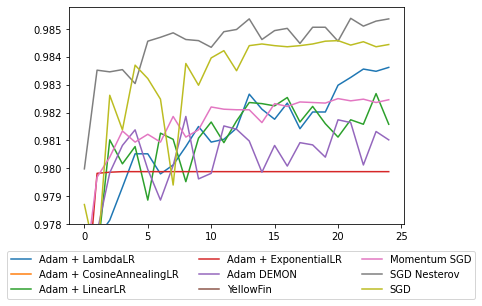

In [115]:
import pylab as plt

l_adam_lambda, l_adam_cos, l_adam_linear, l_adam_exp, l_demon, l_yellowfin, \
l_sgdm, l_nest, l_sgd = [], [], [], [], [], [], [], [], []

for i in range(len(acc_demon)):
  l_adam_lambda.append(acc_lambda[i])
  l_adam_cos.append(acc_cosine[i])
  l_adam_linear.append(acc_linear[i])
  l_adam_exp.append(acc_exponential[i])
  l_demon.append(acc_demon[i])
  l_yellowfin.append(acc_yellowfin[i].item())
  l_sgdm.append(acc_sgdm[i])
  l_nest.append(acc_nest[i])
  l_sgd.append(acc_sgd[i])

plt.plot(l_adam_lambda, label="Adam + LambdaLR")
plt.plot(l_adam_cos, label = "Adam + CosineAnnealingLR")
plt.plot(l_adam_linear, label = "Adam + LinearLR")
plt.plot(l_adam_exp, label = "Adam + ExponentialLR")
plt.plot(l_demon, label = "Adam DEMON")
plt.plot(l_yellowfin, label = "YellowFin")
plt.plot(l_sgdm, label = "Momentum SGD")
plt.plot(l_nest, label = "SGD Nesterov")
plt.plot(l_sgd, label = "SGD")
plt.ylim(0.978,0.9858)
# plt.xlim(0, 25)
plt.legend(bbox_to_anchor = (-0.2, -0.1), loc = 'upper left', ncol = 3, fancybox = True)
plt.show()

## Evolution of the Losses

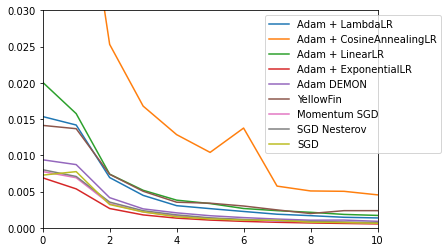

In [116]:
l_adam_lambda, l_adam_cos, l_adam_linear, l_adam_exp, l_demon, l_yellowfin, \
l_sgdm, l_nest, l_sgd = [], [], [], [], [], [], [], [], []

for i in range(len(loss_demon)):
  if i==0:
    l_adam_lambda.append(losses_lambda[i])
    l_adam_cos.append(losses_cosine[i])
    l_adam_linear.append(losses_linear[i])
    l_adam_exp.append(losses_exponential[i])
    l_demon.append(loss_demon[i])
    l_yellowfin.append(losses_yellowfin[i])
    l_sgdm.append(losses_sgdm[i])
    l_nest.append(losses_nest[i])
    l_sgd.append(losses_sgd[i])
  else:
    l_adam_lambda.append(losses_lambda[i]/i)
    l_adam_cos.append(losses_cosine[i]/i)
    l_adam_linear.append(losses_linear[i]/i)
    l_adam_exp.append(losses_exponential[i]/i)
    l_demon.append(loss_demon[i]/i)
    l_yellowfin.append(losses_yellowfin[i]/i)
    l_sgdm.append(losses_sgdm[i]/i)
    l_nest.append(losses_nest[i]/i)
    l_sgd.append(losses_sgd[i]/i)

plt.plot(l_adam_lambda, label="Adam + LambdaLR")
plt.plot(l_adam_cos, label = "Adam + CosineAnnealingLR")
plt.plot(l_adam_linear, label = "Adam + LinearLR")
plt.plot(l_adam_exp, label = "Adam + ExponentialLR")
plt.plot(l_demon, label = "Adam DEMON")
plt.plot(l_yellowfin, label = "YellowFin")
plt.plot(l_sgdm, label = "Momentum SGD")
plt.plot(l_nest, label = "SGD Nesterov")
plt.plot(l_sgd, label = "SGD")
plt.ylim(0.0,0.03)
plt.xlim(0, 10)
plt.legend(bbox_to_anchor = (0.65, 1), loc = 'upper left', ncol = 1, fancybox = True)
plt.show()

Averaging Results of 3 Training Rounds

In [32]:
import pandas as pd
from ast import literal_eval

path1 = "/content/drive/MyDrive/OptML/acc_loss_time_0.csv"
path2 = "/content/drive/MyDrive/OptML/acc_loss_time_1.csv"
path3 = "/content/drive/MyDrive/OptML/acc_loss_time_2.csv"
path4 = "/content/drive/MyDrive/OptML/acc_loss_time_4.csv"

# df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)

# df1.reset_index(drop=True, inplace=True)
# df1.drop(df1.columns[0], axis = 1, inplace=True)
# df1.columns = ['accuracies', 'losses', 'time']

df2.reset_index(drop=True, inplace=True)
df2.drop(df2.columns[0], axis = 1, inplace=True)
df2.columns = ['accuracies', 'losses', 'time']

df3.reset_index(drop=True, inplace=True)
df3.drop(df3.columns[0], axis = 1, inplace=True)
df3.columns = ['accuracies', 'losses', 'time']

df4.reset_index(drop=True, inplace=True)
df4.drop(df4.columns[0], axis = 1, inplace=True)
df4.columns = ['accuracies', 'losses', 'time']

# df1.set_axis(["linear", 
#                     "exponential", 
#                     "cosine", 
#                     "lambda", 
#                     "sgdm", 
#                     "nest", 
#                     "sgd", 
#                     "yellowfin", 
#                     "demon"], axis = 0, inplace=True)
df2.set_axis(["linear", 
                    "exponential", 
                    "cosine", 
                    "lambda", 
                    "sgdm", 
                    "nest", 
                    "sgd", 
                    "yellowfin", 
                    "demon"], axis = 0, inplace=True)
df3.set_axis(["linear", 
                    "exponential", 
                    "cosine", 
                    "lambda", 
                    "sgdm", 
                    "nest", 
                    "sgd", 
                    "yellowfin", 
                    "demon"], axis = 0, inplace=True)
df4.set_axis(["linear", 
                    "exponential", 
                    "cosine", 
                    "lambda", 
                    "sgdm", 
                    "nest", 
                    "sgd", 
                    "yellowfin", 
                    "demon"], axis = 0, inplace=True)


In [39]:
df2.loc(0)["yellowfin"]

accuracies    [tensor(0.9262, device='cuda:0'), tensor(0.935...
losses        [0.016692892494052647, 0.016311525152483956, 0...
time                                                  12.816566
Name: yellowfin, dtype: object

In [56]:
df2.loc(0)["yellowfin"]["accuracies"] = df2.loc(0)["yellowfin"]["accuracies"].replace('tensor(','').replace(', device=\'cuda:0\')','')
df3.loc(0)["yellowfin"]["accuracies"] = df3.loc(0)["yellowfin"]["accuracies"].replace('tensor(','').replace(', device=\'cuda:0\')','')
df4.loc(0)["yellowfin"]["accuracies"] = df4.loc(0)["yellowfin"]["accuracies"].replace('tensor(','').replace(', device=\'cuda:0\')','')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [57]:
df2.loc(0)["yellowfin"]["accuracies"]

"[tensor(0.9262, device='cuda:0'), tensor(0.9358, device='cuda:0'), tensor(0.9154, device='cuda:0'), tensor(0.9297, device='cuda:0'), tensor(0.9290, device='cuda:0'), tensor(0.9407, device='cuda:0'), tensor(0.9351, device='cuda:0'), tensor(0.9465, device='cuda:0'), tensor(0.9423, device='cuda:0'), tensor(0.9405, device='cuda:0'), tensor(0.9472, device='cuda:0'), tensor(0.9387, device='cuda:0'), tensor(0.9306, device='cuda:0'), tensor(0.9357, device='cuda:0'), tensor(0.9308, device='cuda:0'), tensor(0.9373, device='cuda:0'), tensor(0.9218, device='cuda:0'), tensor(0.9370, device='cuda:0'), tensor(0.9046, device='cuda:0'), tensor(0.9251, device='cuda:0'), tensor(0.9265, device='cuda:0'), tensor(0.9300, device='cuda:0'), tensor(0.9418, device='cuda:0'), tensor(0.9371, device='cuda:0'), tensor(0.9200, device='cuda:0')]"

In [51]:
# --------------- LINEAR ----------
# accs1_linear = literal_eval(df1.loc(0)["linear"]["accuracies"])
accs2_linear = literal_eval(df2.loc(0)["linear"]["accuracies"])
accs3_linear = literal_eval(df3.loc(0)["linear"]["accuracies"])
accs4_linear = literal_eval(df4.loc(0)["linear"]["accuracies"])

# losses1 = literal_eval(df1.loc(0)["linear"]["losses"])
losses2_linear = literal_eval(df2.loc(0)["linear"]["losses"])
losses3_linear = literal_eval(df3.loc(0)["linear"]["losses"])
losses4_linear = literal_eval(df4.loc(0)["linear"]["losses"])

  # --------------- Exponential ----------
# accs1_exponential = literal_eval(df1.loc(0)["exponential"]["accuracies"])
accs2_exponential = literal_eval(df2.loc(0)["exponential"]["accuracies"])
accs3_exponential = literal_eval(df3.loc(0)["exponential"]["accuracies"])
accs4_exponential = literal_eval(df4.loc(0)["exponential"]["accuracies"])

# losses1_exponential = literal_eval(df1.loc(0)["exponential"]["losses"])
losses2_exponential = literal_eval(df2.loc(0)["exponential"]["losses"])
losses3_exponential = literal_eval(df3.loc(0)["exponential"]["losses"])
losses4_exponential = literal_eval(df4.loc(0)["exponential"]["losses"])

  # --------------- COSINE ----------
# accs1_cosine = literal_eval(df1.loc(0)["cosine"]["accuracies"])
accs2_cosine = literal_eval(df2.loc(0)["cosine"]["accuracies"])
accs3_cosine = literal_eval(df3.loc(0)["cosine"]["accuracies"])
accs4_cosine = literal_eval(df4.loc(0)["cosine"]["accuracies"])

# losses1_cosine = literal_eval(df1.loc(0)["cosine"]["losses"])
losses2_cosine = literal_eval(df2.loc(0)["cosine"]["losses"])
losses3_cosine = literal_eval(df3.loc(0)["cosine"]["losses"])
losses4_cosine = literal_eval(df4.loc(0)["cosine"]["losses"])

  # --------------- LAMBDA ----------
# accs1_lambda = literal_eval(df1.loc(0)["lambda"]["accuracies"])
accs2_lambda= literal_eval(df2.loc(0)["lambda"]["accuracies"])
accs3_lambda = literal_eval(df3.loc(0)["lambda"]["accuracies"])
accs4_lambda = literal_eval(df4.loc(0)["lambda"]["accuracies"])

# losses1_lambda = literal_eval(df1.loc(0)["lambda"]["losses"])
losses2_lambda = literal_eval(df2.loc(0)["lambda"]["losses"])
losses3_lambda = literal_eval(df3.loc(0)["lambda"]["losses"])
losses4_lambda = literal_eval(df4.loc(0)["lambda"]["losses"])

  # --------------- SGDM ----------
# accs1_sgdm = literal_eval(df1.loc(0)["sgdm"]["accuracies"])
accs2_sgdm = literal_eval(df2.loc(0)["sgdm"]["accuracies"])
accs3_sgdm = literal_eval(df3.loc(0)["sgdm"]["accuracies"])
accs4_sgdm = literal_eval(df4.loc(0)["sgdm"]["accuracies"])

# losses1_sgdm = literal_eval(df1.loc(0)["sgdm"]["losses"])
losses2_sgdm = literal_eval(df2.loc(0)["sgdm"]["losses"])
losses3_sgdm = literal_eval(df3.loc(0)["sgdm"]["losses"])
losses4_sgdm = literal_eval(df4.loc(0)["sgdm"]["losses"])

  # --------------- NESTEROV ----------
# accs1_nest = literal_eval(df1.loc(0)["nest"]["accuracies"])
accs2_nest = literal_eval(df2.loc(0)["nest"]["accuracies"])
accs3_nest = literal_eval(df3.loc(0)["nest"]["accuracies"])
accs4_nest = literal_eval(df4.loc(0)["nest"]["accuracies"])

# losses1_nest = literal_eval(df1.loc(0)[nest]["losses"])
losses2_nest = literal_eval(df2.loc(0)["nest"]["losses"])
losses3_nest = literal_eval(df3.loc(0)["nest"]["losses"])
losses4_nest = literal_eval(df4.loc(0)["nest"]["losses"])

  # --------------- SGD ----------
# accs1_sgd = literal_eval(df1.loc(0)["sgd"]["accuracies"])
accs2_sgd = literal_eval(df2.loc(0)["sgd"]["accuracies"])
accs3_sgd = literal_eval(df3.loc(0)["sgd"]["accuracies"])
accs4_sgd = literal_eval(df4.loc(0)["sgd"]["accuracies"])

# losses1_sgd = literal_eval(df1.loc(0)["sgd"]["losses"])
losses2_sgd = literal_eval(df2.loc(0)["sgd"]["losses"])
losses3_sgd = literal_eval(df3.loc(0)["sgd"]["losses"])
losses4_sgd = literal_eval(df4.loc(0)["sgd"]["losses"])

#   # --------------- YELLOWFIN ----------
# accs1_yellowfin = literal_eval(df1.loc(0)["yellowfin"]["accuracies"])
accs2_yellowfin = df2.loc(0)["yellowfin"]["accuracies"]
accs3_yellowfin = df3.loc(0)["yellowfin"]["accuracies"]
accs4_yellowfin = df4.loc(0)["yellowfin"]["accuracies"]

# losses1_yellowfin = literal_eval(df1.loc(0)["yellowfin"]["losses"])
losses2_yellowfin = literal_eval(df2.loc(0)["yellowfin"]["losses"])
losses3_yellowfin = literal_eval(df3.loc(0)["yellowfin"]["losses"])
losses4_yellowfin = literal_eval(df4.loc(0)["yellowfin"]["losses"])

  # --------------- DEMON ADAM ----------
# accs1_demon = literal_eval(df1.loc(0)["demon"]["accuracies"])
accs2_demon = literal_eval(df2.loc(0)["demon"]["accuracies"])
accs3_demon = literal_eval(df3.loc(0)["demon"]["accuracies"])
accs4_demon = literal_eval(df4.loc(0)["demon"]["accuracies"])

# losses1_demon = literal_eval(df1.loc(0)["demon"]["losses"])
losses2_demon = literal_eval(df2.loc(0)["demon"]["losses"])
losses3_demon = literal_eval(df3.loc(0)["demon"]["losses"])
losses4_demon = literal_eval(df4.loc(0)["demon"]["losses"])


In [52]:
accs_linear = []
accs_exponential = []
accs_cosine = []
accs_lambda = []
accs_demon = []
accs_sgd = []
accs_sgdm = []
accs_nest = []
accs_yellowfin = []
for i in range(25):
  accs_linear.append((accs2_linear[i] + accs3_linear[i] + accs4_linear[i])/3)
  accs_exponential.append((accs2_exponential[i] + accs3_exponential[i] + accs4_exponential[i])/3)
  accs_cosine.append((accs2_cosine[i] + accs3_cosine[i] + accs4_cosine[i])/3)
  accs_lambda.append((accs2_lambda[i] + accs3_lambda[i] + accs4_lambda[i])/3)
  accs_sgdm.append((accs2_sgdm[i] + accs3_sgdm[i] + accs4_sgdm[i])/3)
  accs_sgd.append((accs2_sgd[i] + accs3_sgd[i] + accs4_sgd[i])/3)
  accs_nest.append((accs2_nest[i] + accs3_nest[i] + accs4_nest[i])/3)
  accs_demon.append((accs2_demon[i] + accs3_demon[i] + accs4_demon[i])/3)
  accs_yellowfin.append((accs2_yellowfin[i] + accs3_yellowfin[i] + accs4_yellowfin[i])/3)

TypeError: ignored

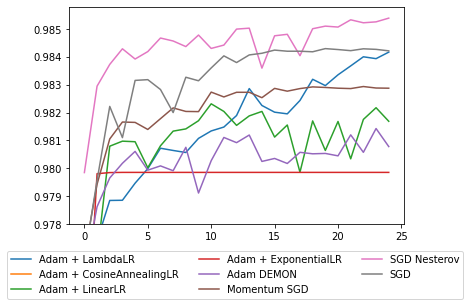

In [13]:
plt.plot(accs_lambda, label="Adam + LambdaLR")
plt.plot(accs_cosine, label = "Adam + CosineAnnealingLR")
plt.plot(accs_linear, label = "Adam + LinearLR")
plt.plot(accs_exponential, label = "Adam + ExponentialLR")
plt.plot(accs_demon, label = "Adam DEMON")
# plt.plot(accs_yellowfin, label = "YellowFin")
plt.plot(accs_sgdm, label = "Momentum SGD")
plt.plot(accs_nest, label = "SGD Nesterov")
plt.plot(accs_sgd, label = "SGD")
plt.ylim(0.978,0.9858)
# plt.xlim(0, 25)
plt.legend(bbox_to_anchor = (-0.2, -0.1), loc = 'upper left', ncol = 3, fancybox = True)
plt.show()

In [14]:
print(f'last linear: {accs_linear[-1]}, max : {max(accs_linear)}')
print(f'last exp: {accs_exponential[-1]}, max: {max(accs_exponential)}')
print(f'last cosine: {accs_cosine[-1]}, max: {max(accs_cosine)}')
print(f'last lambda: {accs_lambda[-1]}, max: {max(accs_lambda)}')
print(f'last sgdm: {accs_sgdm[-1]}, max: {max(accs_sgdm)}')
print(f'last sgd: {accs_sgd[-1]}, max: {max(accs_sgd)}')
print(f'last nest: {accs_nest[-1]}, max: {max(accs_nest)}')
print(f'last demon: {accs_demon[-1]}, max: {max(accs_demon)}')


last linear: 0.9816866397857665, max : 0.9823132952054342
last exp: 0.9798533121744791, max: 0.9798533121744791
last cosine: 0.9220999677975973, max: 0.9682999809583027
last lambda: 0.9841666460037232, max: 0.9841666460037232
last sgdm: 0.9828733046849569, max: 0.9829332987467447
last sgd: 0.9842133164405823, max: 0.9842933058738709
last nest: 0.9853866378466288, max: 0.9853866378466288
last demon: 0.9807800000000001, max: 0.9814266666666667


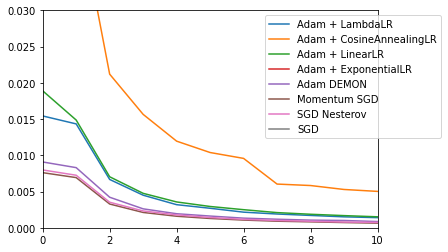

In [15]:
losses_linear = []
losses_exponential = []
losses_cosine = []
losses_lambda = []
losses_demon = []
losses_sgd = []
losses_sgdm = []
losses_nest = []
for i in range(25):
  if i == 0:
    losses_linear.append((losses2_linear[i] + losses3_linear[i] + losses4_linear[i])/3)
    losses_exponential.append((losses2_exponential[i] +losses3_exponential[i] + accs4_exponential[i])/3)
    losses_cosine.append((losses2_cosine[i] + losses3_cosine[i] + losses4_cosine[i])/3)
    losses_lambda.append((losses2_lambda[i] + losses3_lambda[i] + losses4_lambda[i])/3)
    losses_sgdm.append((losses2_sgdm[i] + losses3_sgdm[i] + losses4_sgdm[i])/3)
    losses_nest.append((losses2_nest[i] + losses3_nest[i] + losses4_nest[i])/3)
    losses_demon.append((losses2_demon[i] + losses3_demon[i] + losses4_demon[i])/3)
  else: 
    losses_linear.append((losses2_linear[i] + losses3_linear[i] + losses4_linear[i])/3/i)
    losses_exponential.append((losses2_exponential[i] +losses3_exponential[i] + accs4_exponential[i])/3/i)
    losses_cosine.append((losses2_cosine[i] + losses3_cosine[i] + losses4_cosine[i])/3/i)
    losses_lambda.append((losses2_lambda[i] + losses3_lambda[i] + losses4_lambda[i])/3/i)
    losses_sgdm.append((losses2_sgdm[i] + losses3_sgdm[i] + losses4_sgdm[i])/3/i)
    losses_nest.append((losses2_nest[i] + losses3_nest[i] + losses4_nest[i])/3/i)
    losses_demon.append((losses2_demon[i] + losses3_demon[i] + losses4_demon[i])/3/i)


plt.plot(losses_lambda, label="Adam + LambdaLR")
plt.plot(losses_cosine, label = "Adam + CosineAnnealingLR")
plt.plot(losses_linear, label = "Adam + LinearLR")
plt.plot(losses_exponential, label = "Adam + ExponentialLR")
plt.plot(losses_demon, label = "Adam DEMON")
# plt.plot(losses_yellowfin, label = "YellowFin")
plt.plot(losses_sgdm, label = "Momentum SGD")
plt.plot(losses_nest, label = "SGD Nesterov")
plt.plot(losses_sgd, label = "SGD")
plt.ylim(0.0,0.03)
plt.xlim(0, 10)
plt.legend(bbox_to_anchor = (0.65, 1), loc = 'upper left', ncol = 1, fancybox = True)
plt.show()